# PLAY STORE

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [80]:
ga= pd.read_csv(r'C:\Users\Gaurav\Desktop\Raj\playstore-analysis.csv')

In [81]:
ga.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [82]:
ga.shape

(10841, 13)

In [83]:
ga.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [84]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [85]:
ga.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<font color='GREEN'><b><h2> 1. Data clean up – Missing value treatment</h2></b></font>
### a. Drop records where rating is missing since rating is our target/study variable

In [86]:
ga['Rating'].isnull().sum()

1474

In [87]:
ga = ga.dropna(subset=["Rating"])

In [88]:
ga['Rating'].isnull().sum()

0

### b. Check the null values for the Android Ver column.

In [89]:
ga['Android Ver'].isnull().sum()

3

### i. Are all 3 records having the same problem?

In [90]:
ga[ga['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [91]:
ga=ga.drop(10472)#ga.drop(ga[ga["App"] == "Life Made WI-Fi Touchscreen Photo Frame"].index, inplace = True )

In [92]:
ga[ga['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii. Replace remaining missing values with the mode

In [93]:
ga['Android Ver'].isnull().sum()

2

In [94]:
ga["Android Ver"].fillna(ga["Android Ver"].mode()[0], inplace=True)

In [95]:
ga['Android Ver'].isnull().sum()

0

### c. Current ver – replace with most common value

In [96]:
ga["Current Ver"].fillna(ga["Current Ver"].mode()[0], inplace=True)

In [97]:
ga["Current Ver"].isnull().sum()

0

<font color='GREEN'><b><h2> 2. Data clean up – correcting the data types</h2></b></font>
### a. Which all variables need to be brought to numeric types?

In [98]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


##### we need to convert Reviews, Installs, Price in numeric type

### b. Price variable – remove $ sign and convert to float

In [99]:
ga['Price'] = ga['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
ga['Price'] = ga['Price'].apply(lambda x: float(x))

In [100]:
ga.loc[4453]    #to checkeck if '$' discarded successfully in price col

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                          1,000+
Type                                Paid
Price                               1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                   4.1 and up
Name: 4453, dtype: object

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [101]:
ga['Installs'] = ga['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
ga['Installs'] = ga['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
ga['Installs'] = ga['Installs'].apply(lambda x: float(x))

In [102]:
ga.loc[4453]   #to checkeck if '+'& ',' discarded successfully in 'Installs' col

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                            1000
Type                                Paid
Price                               1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                   4.1 and up
Name: 4453, dtype: object

### d. Convert all other identified columns to numeric

In [103]:
ga['Reviews'] = ga['Reviews'].apply(lambda x: int(x))

In [104]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.3+ MB


##### we have converted Reviews, Installs, Price in numeric types

<font color='GREEN'><b><h2>3. Sanity checks – check for the following and handle accordingly</h2></b></font>
### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
   ###        i. Are there any such records? Drop if so.

In [105]:
ga[ga.Rating < 1]  & ga[ga.Rating > 5] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### b. Reviews should not be more than installs as only those who installed can review the app.
### i. Are there any such records? Drop if so.

In [106]:
ga[(ga.Reviews > ga.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [107]:
ga[(ga.Reviews > ga.Installs)].shape

(7, 13)

In [108]:
ga.drop(ga[ga["Reviews"]>ga["Installs"]].index, inplace = True)

In [109]:
ga[(ga.Reviews > ga.Installs)].shape

(0, 13)

##### removed all rows where Reviews was greater than Installs

<font color='GREEN'><b><h2>4. Identify and handle outliers – </h2></b></font>
### a. Price column
### i. Make suitable plot to identify outliers in price

<AxesSubplot:xlabel='Price'>

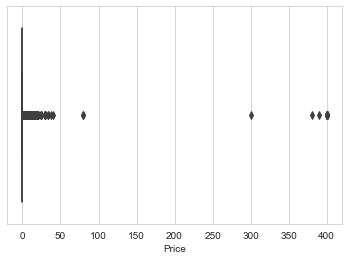

In [110]:
sns.boxplot(x=ga["Price"])


### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [111]:
ga[ga["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [112]:
ga[ga["Price"]>200].shape

(15, 13)

##### yes there is 15 apps costs more than 200

### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [113]:
ga.drop(ga[ga["Price"]>200].index, inplace = True )

<AxesSubplot:xlabel='Price'>

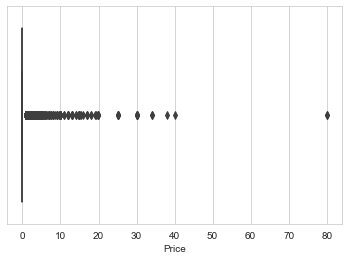

In [114]:
sns.boxplot(x=ga["Price"])

### iv. Limit data to records with price < $30

In [115]:
ga.drop(ga[ga["Price"]>30].index, inplace = True )

In [37]:
print("MAX price- ",ga["Price"].max())
print("MIN Price- ",ga["Price"].min())

MAX price-  29.99
MIN Price-  0.0


##### The dataset is now limited to <30 priced apps

### b. Reviews column
### i. Make suitable plot

<AxesSubplot:xlabel='Price'>

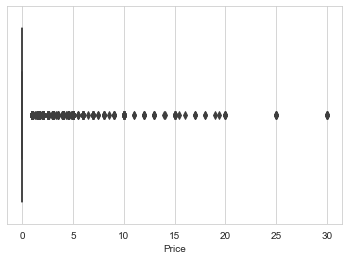

In [38]:
sns.boxplot(x=ga["Price"])

### ii. Limit data to apps with < 1 Million reviews

<AxesSubplot:xlabel='Installs'>

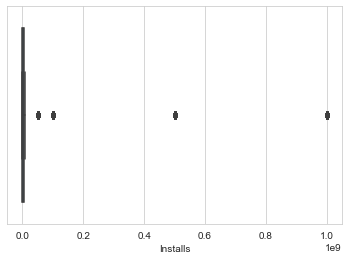

In [39]:
sns.boxplot(x=ga["Installs"])

In [40]:
temp=ga[ga["Reviews"]>1000000]
ga.drop(ga[ga["Reviews"]>1000000].index, inplace = True )
print('No of records dropped here - ',temp.value_counts().sum())

No of records dropped here -  704


### c. Installs
### i. What is the 95th percentile of the installs?

In [41]:
print("The 95th percentile of the installs is ",ga.Installs.quantile(0.95))

The 95th percentile of the installs is  10000000.0


### ii. Drop records having a value more than the 95th percentile

In [42]:
ga.drop(ga[ga["Installs"]>10000000.0].index, inplace = True )

In [43]:
ga.shape

(8435, 13)

<font color='BROWN'><b><h1>Data analysis to answer business questions</h2></b></font>
<font color='GREEN'><b><h2> 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?</h2></b></font>

<AxesSubplot:xlabel='Rating', ylabel='Density'>

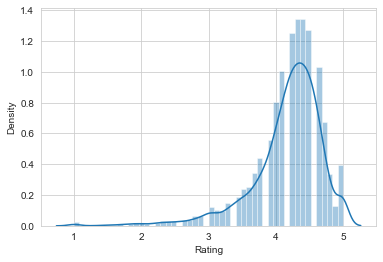

In [44]:
sns.distplot(ga['Rating'])

### a. How do you explain this?

     Most of the apps, clearly hold a rating above 4.0 so it is Left skewed or Negative skewed

### b. What is the implication of this on your analysis?

In [45]:
print("No. of Apps ratings 5 is ",ga.Rating[ga['Rating'] == 5 ].count(),", Which might be spammed")

No. of Apps ratings 5 is  268 , Which might be spammed


<font color='GREEN'><b><h2> 6. What are the top Content Rating values?</h2></b></font>
### a. Are there any values with very few records?

In [46]:
ga['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

##### This two content rating ia having less records - "Adults only 18+","Unrated"

### b. If yes, drop those as they won’t help in the analysis

In [47]:
ga.drop(ga[ga["Content Rating"] == "Adults only 18+"].index, inplace = True )
ga.drop(ga[ga["Content Rating"] == "Unrated"].index, inplace = True )

In [48]:
ga['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

<font color='GREEN'><b><h2>7. Effect of size on rating</h2></b></font>

### a. Make a joinplot to understand the effect of size on rating

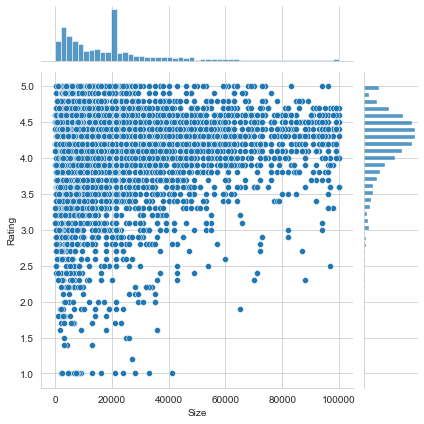

In [49]:
sns.jointplot(ga.Size, ga.Rating)
plt.show()

### b. Do you see any patterns?

     Yes there is a slight negative correlation between Rating and Size

### c. How do you explain the pattern?

     Lighter apps got higher ratings in maximum cases

<font color='GREEN'><b><h2>8. Effect of price on rating</h2></b></font>
### a. Make a jointplot (with regression line)

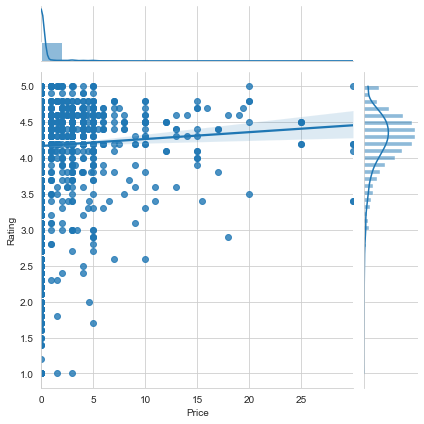

In [50]:
sns.jointplot(x='Price', y='Rating', data=ga, kind='reg')

### b. What pattern do you see?

     There is a negative correlation between Rating and Price

### c. How do you explain the pattern?

    Free apps got most of the higher ratings

### d. Replot the data, this time with only records with price > 0 

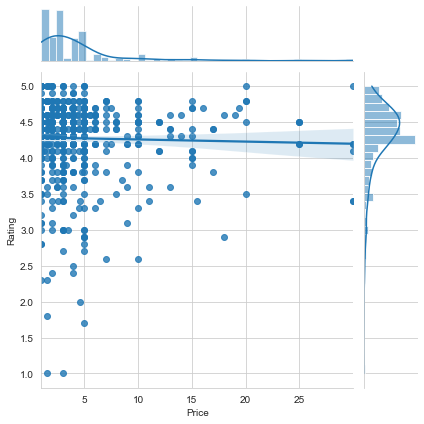

In [51]:
sns.jointplot(x='Price', y='Rating', data=ga.loc[ga.Price>0], kind='reg')

### e. Does the pattern change?

     No there is no major change after limiting this plot among paid apps

### f. What is your overall inference on the effect of price on the rating

     People are more interested in free Apps. Even if they choose any paid app that should be in affordable or low price.

<font color='GREEN'><b><h2>9. Look at all the numeric interactions together – </h2></b></font>
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


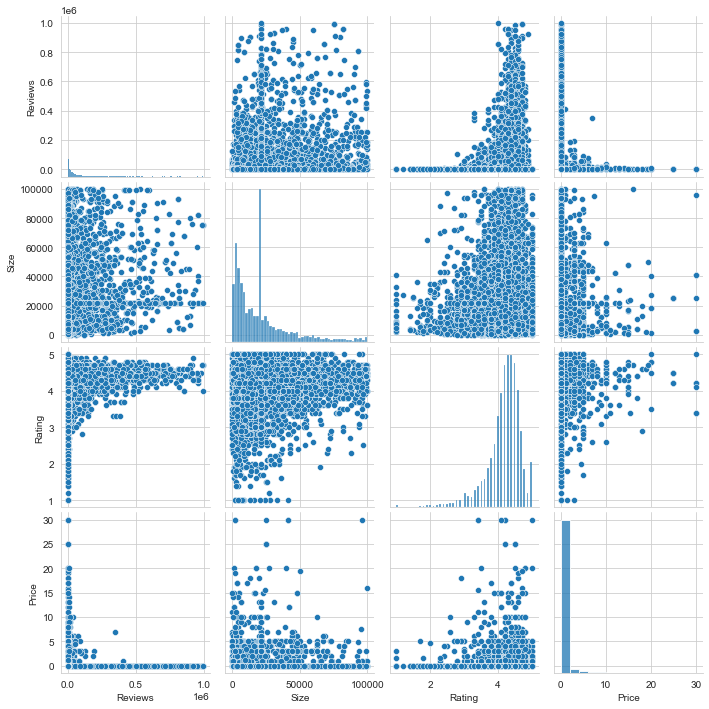

In [52]:
sns.pairplot(ga[['Reviews', 'Size','Rating', 'Price']])
plt.show()

<font color='GREEN'><b><h2> 10. Rating vs. content rating</h2></b></font>
### a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating'>

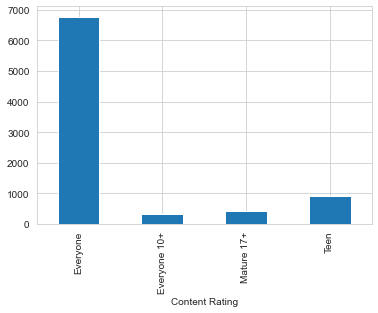

In [53]:
ga.groupby(['Content Rating'])['Rating'].count().plot.bar()

### b. Which metric would you use? Mean? Median? Some other quantile?

<AxesSubplot:xlabel='Rating'>

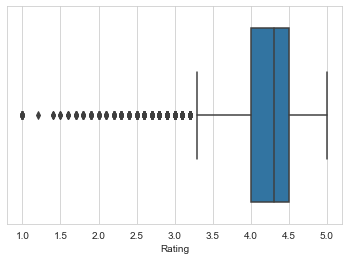

In [54]:
sns.boxplot(ga['Rating'])

##### There are outliers in "Ratings" column, hence median will be best measure of central tendency

### c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

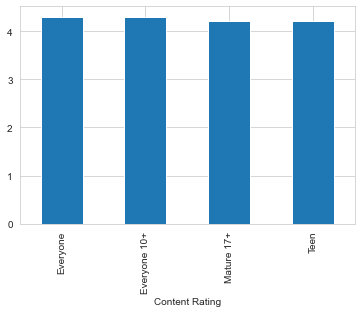

In [55]:
ga.groupby(['Content Rating'])['Rating'].median().plot.bar()    #plotiing with median values

<font color='GREEN'><b><h2>11. Content rating vs. size vs. rating – 3 variables at a time</h2></b></font>
### a. Create 5 buckets (20% records in each) based on Size

In [56]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
ga['Size Bin'] = pd.cut(ga['Size'], bins, labels=['V. light','Light','Moderate','Heavy','V. Heavy'])
pd.pivot_table(ga, values='Rating', index='Size Bin', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size Bin,,,,
V. light,4.145730,4.247561,4.010582,4.182240
Light,4.200195,4.169811,4.156291,4.170432
Moderate,4.167083,4.263636,4.190476,4.237383
Heavy,4.245408,4.280769,4.200000,4.274194
V. Heavy,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [57]:
pivot=pd.pivot_table(ga, values='Rating', index='Size Bin', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
pivot

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size Bin,,,,
V. light,3.80,4.02,3.5,3.9
Light,4.00,4.00,4.0,3.9
Moderate,3.90,4.06,4.1,4.0
Heavy,4.00,4.00,4.0,4.0
V. Heavy,4.04,4.10,4.0,4.0


### c. Make a heatmap of this
### i. Annotated

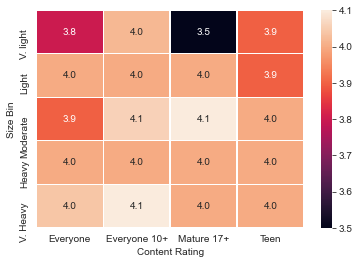

In [58]:
sns.heatmap(pivot, annot=True, fmt='.1f', linewidths=.3)
plt.show()

### ii. Greens color map

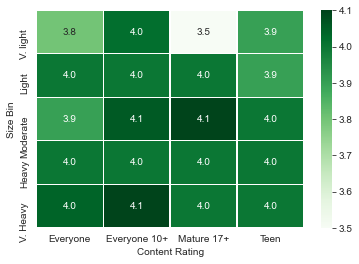

In [59]:
sns.heatmap(pivot, cmap = "Greens", annot=True, fmt='.1f', linewidths=.3)
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

- No lighter apps are not much popular among customers
- Rather than we can say Heavy and Very heavy apps more popular amomg customers

<h1 align="center">End of the file</h1>